### ■学習内容

距離を時間で微分すると速度が算出できます。これを例として、以下のことを学習します。

- numpy を使った数列の生成
- matplotlib を使ったグラフと散布図の作成
- 数式の関数化
- 微分
- 損失関数
- 最適解と解析解

### ■ライブラリーのインポート

以下のライブラリーをインポートしてください。

- Numpy
- Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### ■走行実績の定義

東京から名古屋までの 300km を 3 時間（180 分）を目安に移動する車があるとします。もちろん一定の速度で走る続けるわけではなく、速く走るときもあれば、遅く走るときもあります。
この車は、以下の数式に従って移動するとします。以下の数式の結果を返す Python の関数を作成してください。

- 関数名：func_actual
- 引数：x
- 数式：
$$
f(x) = \frac{300\cdot{x^{\sqrt{2}}}}{180^{\sqrt{2}}}+10\cdot{\sin(0.1\cdot{x})}
$$

※数式自体はこの車の移動を模したもので、大した意味はありません

In [2]:
def func_actual(x):
  return (300 * x ** np.sqrt(2) / 180 ** np.sqrt(2)) + (10 * np.sin(x * 0.1))

### ■走行実績のプロット 

出発から 10 分ごとに移動した距離を計測します。測定ポイントでの東京からの距離をプロットしてください。なお、x 軸を時間（分）、y 軸を距離（km）とします。グラフの目盛りはなるべく整え、x 軸と y 軸のラベルも入れてください。

- x 軸：np.linspace もしくは np.arange を使用する
- y 軸：func_actual より求める

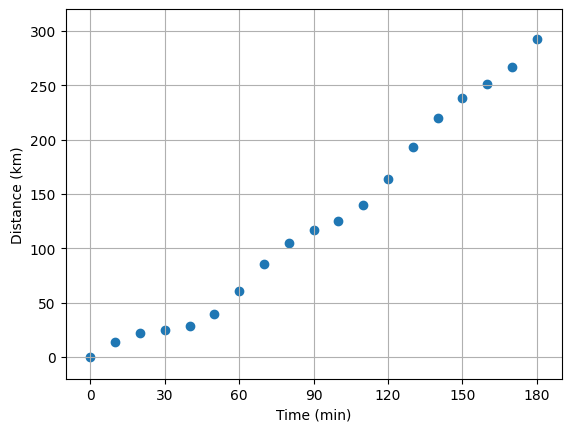

In [3]:
#x = np.linspace(0, 180, 19)
x = np.arange(0, 181, 10)
y = func_actual(x)

plt.scatter(x, y)
plt.xlabel("Time (min)")
plt.ylabel("Distance (km)")
plt.xlim(-10, 190)
plt.ylim(-20, 320)
plt.xticks(np.arange(0, 190, 30))
plt.grid()
plt.show()

### ■平均速度の算出①

速度は距離÷時間で求めることができます。距離が必要であるということは、速度を求めるためには 2 つ地点が必要であるということを意味します（※）。60 ～ 70 分目の地点、90 ～ 91 分目の地点、120 ～ 120.0001 分目の地点の平均時速をそれぞれ求めてください。

※これを 1 箇所で求めるのが微分です。

In [4]:
time1 = 60
time2 = 70
dist1 = func_actual(time1)
dist2 = func_actual(time2)
velocity = (dist2 - dist1) / (time2 - time1)
print(f"{time1} 分目から {time2} 分目までの平均時速は {velocity*60:.1f} km/hです")

time1 = 90
time2 = 91
dist1 = func_actual(time1)
dist2 = func_actual(time2)
velocity = (dist2 - dist1) / (time2 - time1)
print(f"{time1} 分目から {time2} 分目までの平均時速は {velocity*60:.1f} km/hです")

time1 = 120.0
time2 = 120.0001
dist1 = func_actual(time1)
dist2 = func_actual(time2)
velocity = (dist2 - dist1) / (time2 - time1)
print(f"{time1} 分目から {time2} 分目までの平均時速は {velocity*60:.1f} km/hです")

60 分目から 70 分目までの平均時速は 148.9 km/hです
90 分目から 91 分目までの平均時速は 50.6 km/hです
120.0 分目から 120.0001 分目までの平均時速は 170.2 km/hです


### ■平均速度の算出②

少し形を変えて、120 分目の地点と、その 0.0001 分後の地点の平均時速を求めてください。また、120 分目の地点の東京からの距離も求めてください。

In [5]:
time = 120.0
interval = 0.0001
dist1 = func_actual(time)
dist2 = func_actual(time + interval)
velocity = (dist2 - dist1) / interval
print(f"{time} 分目から {time + interval} 分目までの平均時速は {velocity*60:.1f} km/hです")
print(f"{time} 分目の東京からの距離は {dist1:.1f} kmです")

120.0 分目から 120.0001 分目までの平均時速は 170.2 km/hです
120.0 分目の東京からの距離は 163.7 kmです


### ■微分係数（differential coefficient）を求める関数の定義

上記のことから、式として定まっているならば、実測していなくても距離を求めることができることがわかります。また、2 点間の距離が短ければ短けほど、より正確な値が求められることがわかります。逆に、距離を実測することができれば、数式は必要ないこともわかります。これは、実世界にスピードメーターが存在することでも明らかです。

書籍などでは、以下のような言い回しでこれを説明しています。

---

$x$ を入力として値を求める関数 $f(x)$ の微分は $f´(x)$ や $\dfrac{df(x)}{dx}$ で表され、次の式で定義される。
<br>
<br>
$$
\dfrac{df(x)}{dx} = \lim_{h \to 0}\dfrac{f(x+h)-f(x)}{h}
$$

---

この時の $h$ は 2 点間の差を表します。120.0 分目から 120.0001 分の例でいえば 0.0001 という値です。きっと、皆さんが書いたコードでも、割り算の分母で差を求めているのではないでしょうか。
では、次に上記の数式を Python の関数として作成してください。

- 関数名：func_deriv
- 引数：x <- 関数 $f(x)$ に与える引数 $x$
- 数式：$\dfrac{df(x)}{dx} = \lim_{h \to 0.0001}\dfrac{f(x+h)-f(x)}{h}$

※$f(x)$ は func_actual が該当します<br>
※$h$ の値は 0.0001 で固定します

In [6]:
def func_deriv(x):                         # f: 走行実績を表す関数, x: 経過時間（分）
  h = 0.0001                                  # 本来はこれを極限まで 0 に近づけていく -> 極限値 
  return (func_actual(x + h) - func_actual(x)) / h                # 導関数（前進差分近似）
#  return (func_actual(x + h) - func_actual(x - h)) / (2 * h)      # 導関数（中心差分近似）

### ■微分係数を求める

func_deriv を使用して、120 分目の分速と位置を求めてください。

In [7]:
minutes = 120
distance = func_actual(minutes)
velocity = func_deriv(minutes)
print(f"{minutes} 分目の分速は {velocity:.1f}km/min（{velocity*60:.1f}km/h）、位置は {distance:.1f}kmです")

120 分目の分速は 2.8km/min（170.2km/h）、位置は 163.7kmです


<u>ここで求めた値が『微分係数（differential coefficient）』であり『分速（velocity）』であり『傾き（slope）』です。これらはすべて同じものを指します。</u>

### ■ 接線を描画する（切片は手動で調整する）

走行結果である func_actual の結果をグラフとして描き、その上にこの微分係数（＝傾き）を使った 1 次関数の直線を重ね合わせてください。なお、ここでは散布図ではなく x 軸を 100 ポイント位とした線として描いてください。
なお、1 次関数の切片は適当に入力し、なんとなく120 分目に合うようにしてください。ここでは、傾きが妥当であることが確認ができれば十分です。
今回の事例では、切片がマイナスになるはずです。

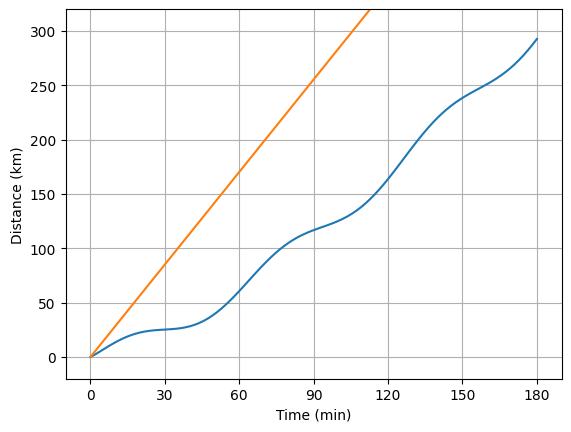

In [8]:
minutes = 120
slope = func_deriv(minutes)        # y = ax + b の a

x = np.linspace(0, 180, 100)
y1 = func_actual(x)
y2 = slope * x - 0                              # y = ax + b の b の部分は適当に 

plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("Time (min)")
plt.ylabel("Distance (km)")
plt.xlim(-10, 190)
plt.ylim(-20, 320)
plt.xticks(np.arange(0, 190, 30))
plt.grid()
plt.show()

### ■最適解を求める①（切片を自動的に調整する）
for 文か while 文を使って速度の 1 次関数の切片を徐々に変更していき、120 分目のfunc_actual の結果との接点を求めるプログラムを作成してください。
完全に一致しなくても構いません。なお、変化させる値は 0.1 ぐらいがいいでしょう。また、$y=ax+b$ の形式とするため、切片の記号は$+$とし、変化させる値のほうを減算してください。

In [9]:
minutes = 120
intercept = 0
slope = func_deriv(minutes)
target_distance = func_actual(minutes)

while True:
  current_distance = slope * minutes + intercept          # 1 次関数 y = ax + b の形 
  if (current_distance < target_distance):
    break
  intercept = intercept - 0.1

intercept = intercept + 0.1                    #-> -0.1してからループを抜けているので、なんとなく元に戻してみる。どちらにしても誤差はある
print(f"{minutes} 分目の接線の傾きは {slope:.1f}、切片は {intercept:.1f} あたりです。")

120 分目の接線の傾きは 2.8、切片は -176.6 あたりです。


### ■最適解を求める②（グラフを描画する）

では、ここでもう一度走行結果である func_actual の結果のグラフを描き、上記で求めた傾きと切片を利用した 1 次関数の直線を重ね合わせてください。

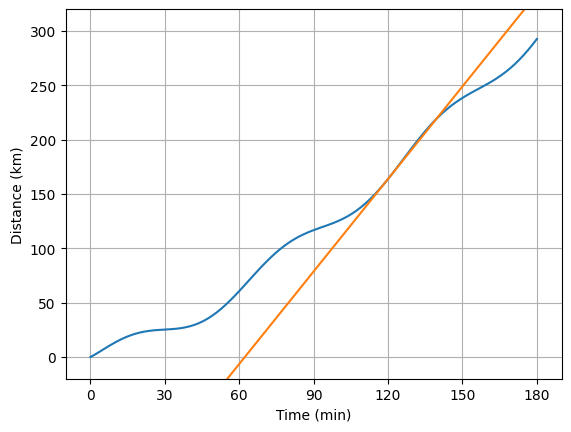

In [10]:
x = np.linspace(0, 180, 100)
y1 = func_actual(x)
y2 = slope * x + intercept

plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("Time (min)")
plt.ylabel("Distance (km)")
plt.xlim(-10, 190)
plt.ylim(-20, 320)
plt.xticks(np.arange(0, 190, 30))
plt.grid()
plt.show()

### ■最適解を求める③（損失関数（loss function）を定義する）

計算結果を最小にすべき関数を損失関数（loss function）と言います。指定された時刻（分目）における切片の誤差を算出する関数を func_loss として作成してください。なお、誤差なのでマイナスの値は取らないようにしてください。

- 関数名：func_loss
- 引数：x <- 該当の時刻（分目）
- 引数：i <- 切片
- 数式：各自で考えること。アルゴリズムではなく数式であることに注意（つまり1行で書けること）

※切片の自動調整をしようとするとき、基準となる時刻における走行実績と、ここから求めた 1 次関数による直線の切片との間に、どれくらいの誤差があるのかを求めるのが趣旨です。<br>
※走行実績には func_actual を、1 次関数の傾きを求めるためには func_deriv を利用してください。

In [11]:
def func_loss(x, i):
#  return abs(func_actual(x) - (func_deriv(x) * x + i))                     # 絶対値でマイナスを消す
  return (func_actual(x) - (func_deriv(x) * x + i)) ** 2                   # func_actual が曲線、func_deriv が直線。2 乗してマイナスを消す

# ■ Target
# target_distance = func_actual(minutes)

# ■ Current
# current_distance = slope * minutes + intercept => func_deriv(minutes) * minutes + intercept => ax + b

# ■ Loss Function
# (func_deriv(minutes) * minutes + intercept) - func_actual(minutes) の絶対値か二乗

### ■最適解を求める④（誤差関数を使って切片を調整する）

for 文か while 文の中で損失関数の結果が最小になるようなプログラムを作成し、120 分目の切片を求めてください。このように求めた解を『最適解』といいます。

In [12]:
minutes = 120
intercept = 0
loss_before = func_loss(minutes, intercept)

while True:
  loss_current = func_loss(minutes, intercept)
  if (loss_before < loss_current):
    break
  intercept = intercept - 0.1
  loss_before = loss_current

intercept = intercept + 0.1                     #-> -0.1してからループを抜けているので、なんとなく元に戻してみる。どちらにしても誤差はある
print(f"{minutes} 分目の接線の傾きは {slope:.1f}、切片は {intercept:.1f} あたり、誤差は {loss_before:.8f} です。")

120 分目の接線の傾きは 2.8、切片は -176.7 あたり、誤差は 0.00132980 です。


### ■最適解を求める⑤（グラフを描画する）

では、ここで求めた値を使って、もう一度距離の推移と接線を重ね合わせたグラフを書いてみましょう。

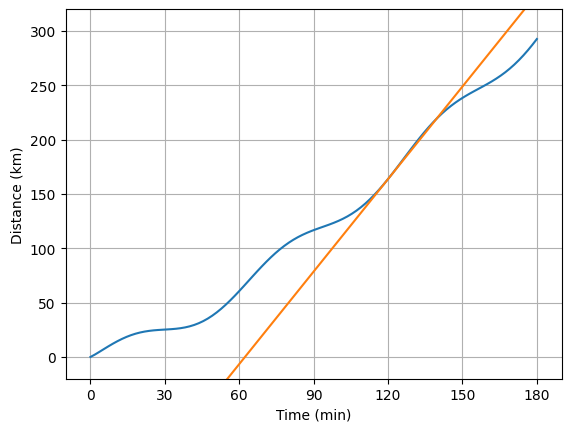

In [13]:
x = np.linspace(0, 180, 100)
y1 = func_actual(x)
y2 = slope * x + intercept

plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("Time (min)")
plt.ylabel("Distance (km)")
plt.xlim(-10, 190)
plt.ylim(-20, 320)
plt.xticks(np.arange(0, 190, 30))
plt.grid()
plt.show()

### ■ 解析解を求める①（誤差関数の結果を利用する）

- ここまで接線を最適解として求めてきましたが、誤差関数を変形して切片を解く方程式を作ることが可能です。
- 今回の場合は、下記のように「走行実績の曲線から求めた $y$ 」と「切片 0 の直線から求めた $y$ 」の差を求めればよいことになります。

---

- 120 分目時点の走行実績の結果は $f(x)$　← $f(x)$ は func_actual
- 120 分目時点の 1 次直線の結果は $f'(x)x+b$　← $f'(x)$ は func_deriv（$f'(x)$ は傾きで $ax+b$ の $a$）
- 2 つの線が接するのは、切片が $f'(x)x+b-f(x)=0$ のとき
- つまり、$b= f(x)-f'(x)x$ で、これは本質的に誤差関数と同じ

(func_deriv(minutes) * minutes + intercept) - func_actual(minutes) = 0 <br>
func_deriv(minutes) * minutes + intercept = func_actual(minutes) <br>
intercept = func_actual(minutes) - (func_deriv(minutes) * minutes) <br>

---

走行結果である func_actual の結果から求めた y と、切片 0 の直線から求めた y の差を切片とするプログラムを作成してください。


In [14]:
minutes = 120
distance = func_actual(minutes)
slope = func_deriv(minutes)
intercept = distance - (slope * minutes)        # 曲線から求めた y と、切片 0 の直線から求めた y の差を出せばいい

print(f"{minutes} 分目の接線の傾きは {slope:.1f}、切片は {intercept:.5f} です。速度は {(slope * 60):.1f}km/h です。")  

120 分目の接線の傾きは 2.8、切片は -176.66353 です。速度は 170.2km/h です。


### ■ 解析解を求める②（グラフを描画する）

では、ここで求めた値を使って、もう一度距離の推移と接線を重ね合わせたグラフを書いてみましょう。

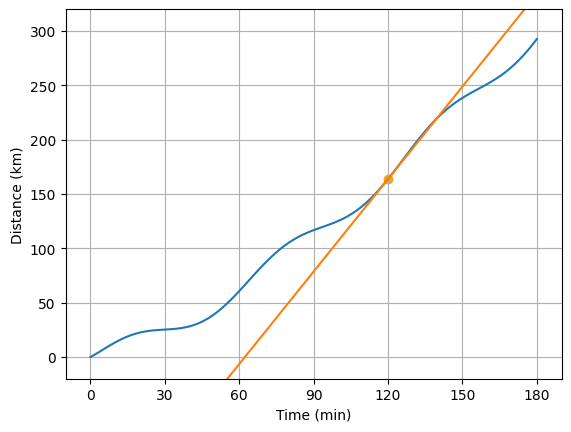

In [15]:
x = np.linspace(0, 180, 100)
y1 = func_actual(x)
y2 = slope * x + intercept

plt.plot(x, y1)
plt.plot(x, y2)
plt.scatter(minutes, distance, color='orange')
plt.xlabel("Time (min)")
plt.ylabel("Distance (km)")
plt.xlim(-10, 190)
plt.ylim(-20, 320)
plt.xticks(np.arange(0, 190, step=30))
plt.grid()
plt.show()

### ■速度の推移

最後に func_deriv を用いて 0 分目から 180 分目までのグラフを描画します。ここで描かれるグラフが速度の推移になります。単位も km/h にしましょう。

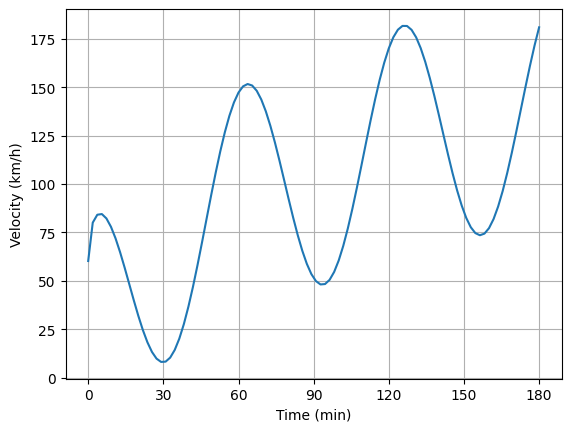

In [16]:
x = np.linspace(0, 180, 100)
y = func_deriv(x)

plt.plot(x, y * 60)
plt.xlabel("Time (min)")
plt.ylabel("Velocity (km/h)")
plt.xticks(np.arange(0, 190, step=30))
plt.grid()
plt.show()

なお、元々の数式と、それの導関数は以下のようになります。

・元々の関数：$f(x) = \frac{300\cdot{x^{\sqrt{2}}}}{180^{\sqrt{2}}}+10\cdot{\sin(0.1\cdot{x})}$<br>
・導関数：$f'(x) = \frac{300\cdot{\sqrt{2}\cdot{x^{\sqrt{2}-1}}}}{180^{\sqrt{2}}}+10\cdot0.1\cdot{{\cos(0.1\cdot{x})}}$<br>

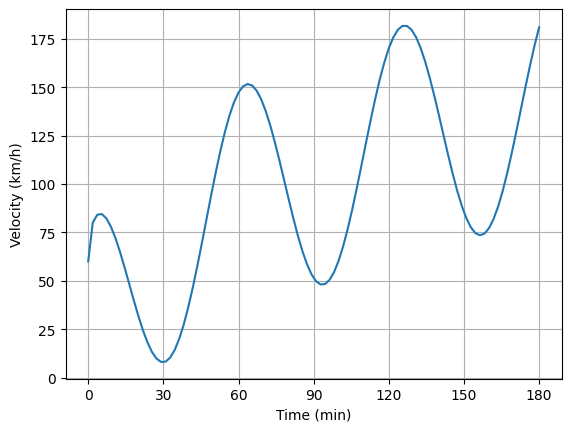

In [17]:
x = np.linspace(0, 180, 100)
y_deriv = (300 * np.sqrt(2) * (x ** (np.sqrt(2) - 1)) / 180 ** np.sqrt(2)) + (10 * 0.1 * np.cos(0.1 * x))

plt.plot(x, y_deriv * 60)
plt.xlabel("Time (min)")
plt.ylabel("Velocity (km/h)")
plt.xticks(np.arange(0, 190, step=30))
plt.grid()
plt.show()